In [1]:
from __future__ import division
import bokeh as bk
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import msgpack
import toolz
import scipy.stats as st
import matplotlib.pylab as plt
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import blosc
import cPickle as pkl
import random

In [2]:
def get_genes():
    with open('genes.msg', 'rb') as f:
        return set(msgpack.unpackb(f.read()))

def get_gene_map_intron():
    with open('gene_map_intron.msg', 'rb') as f:
        return dict(msgpack.unpackb(f.read()))

def nice_df(df):
    df['nsuc'] = df['nread0']
    df['ntri'] = df['nread0'] + df['nread1']
    del df['nread0']
    del df['nread1']
    return df

def load_entire_file():
    with open('intron_events_filter1.pkl.blp', 'rb') as f:
        return pkl.loads(blosc.decompress(f.read()))

In [3]:
genes = get_genes()
gene_map_intron = get_gene_map_intron()
gi = gene_map_intron
gene_intron = [(k, v) for k in gi.keys() for v in gi[k]]
df = load_entire_file()

In [4]:
df.head()

assay  nsuc  ntri
gene            intron                                  
ENSG00000000003 1       HG00096.1.M_111124_6     0     2
                1       HG00097.7.M_120219_2     0     2
                1       HG00099.1.M_120209_6     0     0
                1       HG00099.5.M_120131_3     0     2
                1       HG00100.2.M_111215_8     0     0

(0, 1000)

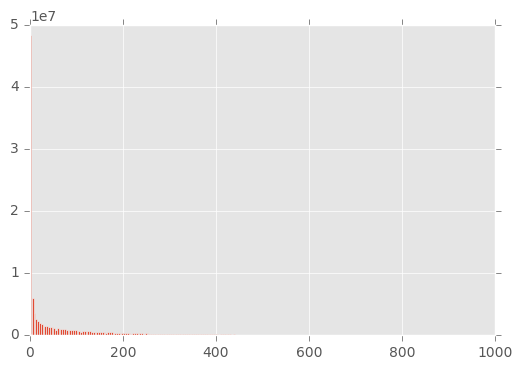

In [7]:
ax = df['ntri'].hist(bins=5000)
ax.set_xlim([0, 1000])

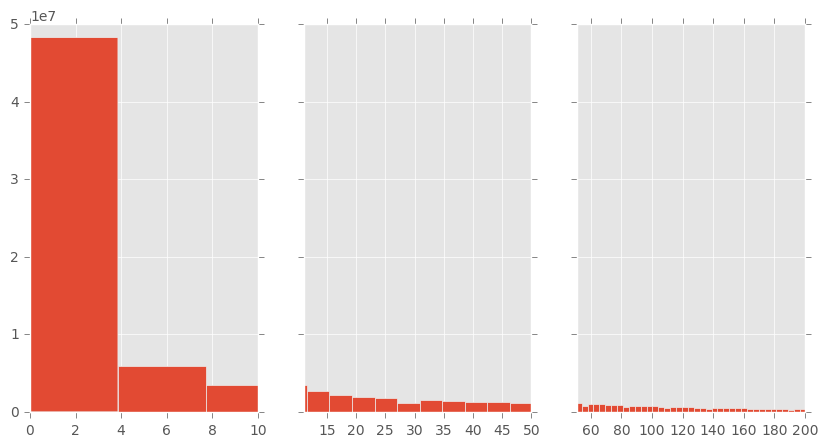

In [10]:
f, ((ax0, ax1, ax2)) = plt.subplots(1, 3, facecolor='w',
                               sharey='row',
                               figsize=(10,5))

df['ntri'].hist(ax=ax0, bins=5000)
ax0.set_xlim([0, 10])

df['ntri'].hist(ax=ax1, bins=5000)
ax1.set_xlim([11, 50])

df['ntri'].hist(ax=ax2, bins=5000)
ax2.set_xlim([51, 200]);

In [11]:
freq = df.groupby('ntri').size()

In [20]:
freq.to_frame().rename(columns={0:'Frequency'}).head(30)

,Frequency
ntri,
0,37159076
1,4298650
2,4809441
3,2024477
4,2183312
5,1342509
6,1407537
7,1024206
8,1056628
